# 5. 모델 평가와 성능 향상
+ train_test_split 함수 : 데이터셋을 훈련 세트와 테스트 세트로 나눔
+ fit 메서드 : 모델을 만들기 위해 훈련 세트에 적용
+ score 메서드 : 모델을 평가하기 위해 테스트 세트에 적용, 정확히 분류된 샘플의 비율을 계산함

In [1]:
# 실습하기 전 import문
import numpy as np
import pandas as pd
import mglearn
import sklearn
from IPython.display import display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
# 한글 Font
from matplotlib import rc
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# 인위적인 데이터셋을 만듭니다
X, y = make_blobs(random_state=0)
# 데이터와 타깃 레이블을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 모델 객체를 만들고 훈련 세트로 학습시킵니다
logreg = LogisticRegression().fit(X_train, y_train)
# 모델을 테스트 세트로 평가합니다
print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


+ 데이터를 훈련 세트와 테스트 세트로 나누는 이유는 새로운 데이터에 모델이 얼마나 잘 일반화되는지 측정하기 위함이다. -> 새로운 데이터를 얼마나 잘 예측하느냐가 중요
+ Ch.5 내용
  + 안정적인 일반화 성능 측정 방법인 교차 검증 소개
  + 정확도와 값 이외에 socre 메서드가 제공하는 회귀 성능 측정 방법 소개
  + 지도 학습 모델의 매개변수를 조정하는 데 유용한 그리드 서치

## 5.1 교차 검증
+ 교차 검증이란 일반화 성능을 측정하기 위한 통계적 평가 방법  
-> 훈련 세트와 테스트 세트로 나누는 것보다 더 안정적이고 효과적임
+ 교차 검증에서는 데이터를 여러 번 반복해서 나누고 여러 모델을 학습함
+ k-겹 교차 검증
  + k는 특정 숫자이고 보통 5 또는 10을 사용
  + 5겹 교차 검증을 한다면 데이터를 폴드라고 하는 비슷한 크기의 '부분 집합' 다섯 개로 나눔
  + 첫 번째 모델은 첫 번째 폴드를 테스트 세트로 사용하고 나머지(2에서 5) 폴드를 훈련 세트로 사용하여 학습  
    -> 즉, 2~5까지의 데이터를 사용해 모델을 만들고 폴드 1을 사용해 정확도 평가
  + 마지막에 5개의 정확도 값을 얻게 됨

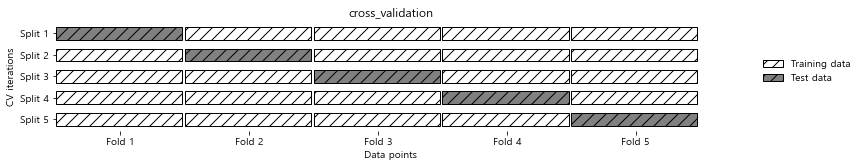

In [4]:
mglearn.plots.plot_cross_validation()

### 5.1.1 scikit-learn의 교차 검증
+ scikit-learn에서 교차 검증은 model_selection 모듈의 cross_val_score 함수로 구현됨
+ cross_val_score 함수의 매개변수는 평가하려는 모델, 훈련 데이터, 타깃 레이블이다.

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수:", scores)

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+ 여기서는 3겹 교차 검증을 수행했기 때문에 3개의 점수가 반환됨
+ 폴드의 수는 cv 매개변수를 사용해 바꿀 수 있음

In [6]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("교차 검증 점수:", scores)

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+ 검증의 정확도를 간단하게 나타내기 위해 평균 사용

In [7]:
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.97


+ 위의 5-겹 교차 검증 값들을 보면 비교적 차이가 큰데 이는 모델이 훈련에 사용한 폴드에 매우 의존적이거나 데이터셋이 작기 때문일 수 있다.
+ 교차 검증에 cross_validate 함수를 사용할 수도 있다.
  + 분할마다 훈련과 테스트에 걸린 시간을 담은 딕셔너리를 반환

In [8]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5,
return_train_score=True)
display(res)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'fit_time': array([0.03390908, 0.05585146, 0.02992058, 0.02792311, 0.0279274 ]),
 'score_time': array([0.        , 0.        , 0.00099778, 0.        , 0.        ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [9]:
res_df = pd.DataFrame(res)
display(res_df)
print("평균 시간과 점수:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.033909,0.000000,0.966667,0.966667
1,0.055851,0.000000,1.000000,0.966667
2,0.029921,0.000998,0.933333,0.983333
3,0.027923,0.000000,0.966667,0.983333
4,0.027927,0.000000,1.000000,0.975000


평균 시간과 점수:
 fit_time       0.035106
score_time     0.000200
test_score     0.973333
train_score    0.975000
dtype: float64


### 5.1.2 교차 검증의 장점
+ 1. 각 샘플이 모두 한 번씩 테스트 세트에 들어간다.
   + train_test_split는 데이터를 무작위로 나누기 때문에 일반화가 어려울 수 있다
+ 2. 데이터를 여러 개로 나누면 모델이 훈련 데이터에 얼마나 민감한지 알 수 있다.
   + 값의 범위를 통해 최악의 경우와 최선의 경우를 짐작할 수 있게 한다.
+ 3. 분할을 한 번 했을 때보다 데이터를 더 효과적으로 사용할 수 있다.
   + 5겹 교차 검증을 사용하면 데이터의 80퍼센트를 모델 학습에 사용하고 10겹 교차 검증일 경우 데이터의 90퍼센트를 모델 학습에 사용한다.  
      
+ 그 외 단점) 모델을 k개 만들기 때문에 연산 비용이 늘어난다.

### 5.1.3 계층별 k-겹 교차 검증과 그외 전략들

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris 레이블:\n", iris.target)

Iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


+ 첫 번째 반복에서 테스트 세트는 클래스 0만을, 훈련 세트는 클래스 1과 2만을 가지게 된다.
+ 세 번의 반복 모두 훈련 세트와 테스트 세트의 클래스가 다르므로 이 검증의 정확도는 0이 된다.
+ 이러한 문제를 해결하기 위해 계층별 k-겹 교차 검증을 사용한다.

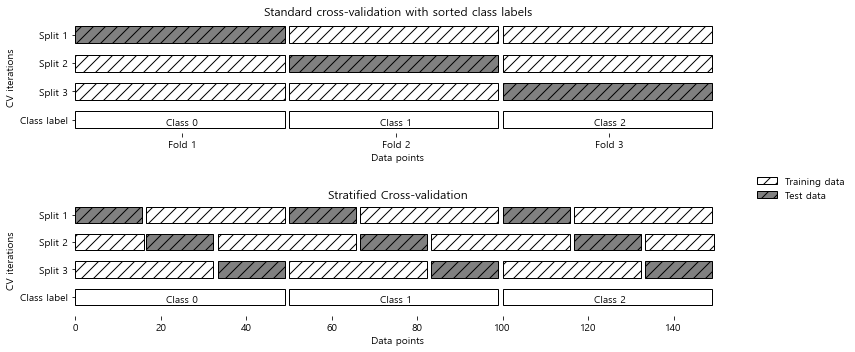

In [11]:
mglearn.plots.plot_stratified_cross_validation()

##### 교차 검증 상세 옵션

+ scikit-learn에서는 cv 매개변수에 교차 검증 분할기를 전달함으로써 데이터를 더 세밀하게 분할 가능
+ 대부분의 경우 회귀에서는 k-겹 교차 검증, 분류에서는 계층별 k-겹 교차 검증의 기본값이 잘 작동함
+ 하지만, 다른 사람의 결과를 재현하기 위해 분류 데이터셋에 기본 k-겹 교차 검증을 사용할 때는 다른 방법
이 필요함  
-> model_selection 모듈에서 KFold 분할기를 임포트하고 원하는 폴드 수를 넣어 객체 생성

In [12]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

+ kfold 객체를 cross_val_score의 cv 매개변수로 전달

In [13]:
print("교차 검증 점수:\n",
cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [1.         1.         0.86666667 0.93333333 0.83333333]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [14]:
kfold = KFold(n_splits=3)
print("교차 검증 점수:\n",
cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0. 0. 0.]


+ 각 폴드는 iris 데이터셋의 클래스 중 하나에 대응하므로 학습이 불가능하다.  
-> 해결 방법은 KFold의 shuffle 매개변수를 True로 줘서 데이터를 섞는 것이다.
+ suffle 매개변수가 True 이면 cross_val_score를 실행할 때마다 매번 결과가 달라지고 random_state를 고정해서 똑같은 작업을 재현할 수 있다.

In [15]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차 검증 점수:\n",
cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0.98 0.96 0.96]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

### LOOCV
+ 폴드 하나에 샘플 하나만 들어 있는 k-겹 교차 검증이다.
+ 각 반복에서 하나의 데이터 포인트를 선택해 테스트 데이터로 사용한다.
+ 작은 데이터셋에서 더 좋은 결과를 만든다.

In [17]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차 검증 분할 횟수: ", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

교차 검증 분할 횟수:  150
평균 정확도: 0.97


#### 임의 분할 교차 검증
+ train_size만큼의 포인트로 훈련 세트를 마들고, test_size만큼의 포인트로 테스트 세트를 만들도록 분할한다.
+ 이 분할은 n_splits 횟수만큼 반복된다.

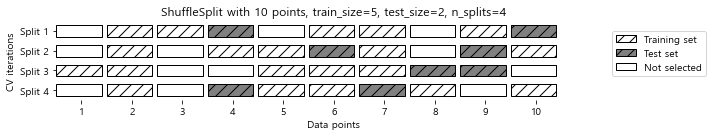

In [18]:
mglearn.plots.plot_shuffle_split()

In [19]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:\n", scores)

교차 검증 점수:
 [1.         0.96       0.92       0.98666667 0.97333333 0.90666667
 0.94666667 0.93333333 0.97333333 0.97333333]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+ 임의 분할 교차 검증은 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절해야 할 때 유용하
다.  
-> 전체 데이터의 일부만 사용할 수 있으므로 대규모 데이터셋을 효율적으로 작업할 수 있다.
### 그룹별 교차 검증
+ 데이터 안에 매우 연관된 그룹이 있을 때 사용한다.
+ 샘플의 배열을 gruop 매개변수로 전달받을 수 있는 GruopKFold를 사용한다.
+ group 배열은 훈련 세트와 테스트 세트를 만들 때 분리되지 않아야 할 그룹을 지정하는 것이며, 클래스 레이블과 혼동해서는 안 된다.

In [20]:
from sklearn.model_selection import GroupKFold
# 인위적 데이터셋 생성
X, y = make_blobs(n_samples=12, random_state=0)
# 처음 세 개의 샘플은 같은 그룹에 속하고
# 다음은 네 개의 샘플이 같습니다.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n", scores)

교차 검증 점수:
 [0.75       0.6        0.66666667]


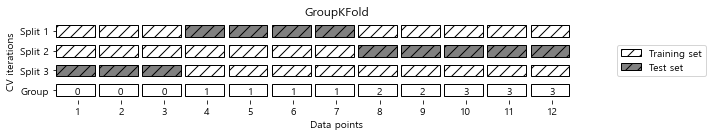

In [21]:
mglearn.plots.plot_group_kfold()

### 5.1.4 반복 교차 검증
+ 데이터셋의 크기가 크지 않을 경우 안정된 검증 점수를 얻기 위해 교차 검증을 반복하여 수행한다.

In [22]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
logreg = LogisticRegression()

In [23]:
from sklearn.model_selection import RepeatedStratifiedKFold
rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)
print("교차 검증 점수:\n", scores)
print("교차 검증 평균 점수: {:.3f}".format(scores.mean()))

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

교차 검증 점수:
 [1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
교차 검증 평균 점수: 0.965


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

## 5.2 그리드 서치
+ scikit-learn의 그리드 서치 매서드를 통해 매개변수를 튜닝하여 일반화 성능을 개선할 수 있다.
+ 관심있는 매개변수들을 대상으로 가능한 모든 조합을 시도해본다.

### 5.2.1 간단한 그리드 서치
+ for 문을 사용하여 두 매개변수(gamma, 매개변수 C) 조합에 대해 분류기를 만들 수 있다.

In [24]:
# 간단한 그리드 서치 구현
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
random_state=0)
print("훈련 세트의 크기: {} 테스트 세트의 크기: {}".format(
X_train.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 SVC를 평가합니다
        score = svm.score(X_test, y_test)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("최고 점수: {:.2f}".format(best_score))
print("최적 파라미터:", best_parameters)

훈련 세트의 크기: 112 테스트 세트의 크기: 38
최고 점수: 0.97
최적 파라미터: {'C': 100, 'gamma': 0.001}


### 5.2.2 매개변수 과대적합과 검증 세트 & 5.2.3 교차 검증을 사용한 그리드 서치

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
iris = load_iris()

### 5.2.2 매개변수 과대적합과 검증 세트
+ In[21]의 정확도는 매우 잘못된 것일 수 있다.  
즉, 이 정확도는 새로운 데이터에까지 이어지지 않을 수 있다.  
-> 매개변수를 조정하기 위해 테스트 세트를 이미 사용했기 때문에 모델이 얼마나 좋은지 평가하는 데에 더 이상 사용할 수가 없다.  
따라서 평가를위해서는 모델을 만들 때 사용하지 않은 독립된 데이터셋이 필요하다.  
이런 문제는 데이터를 세 개의 세트로 만들면 해결 가능하다.

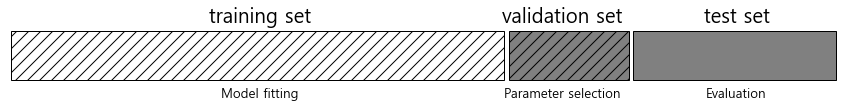

In [26]:
# In[22]:
# 훈련 세트, 검증 세트, 테스트 세트의 3개 폴드로 나눈 데이터
mglearn.plots.plot_threefold_split()

In [29]:
# In [23]:
from sklearn.svm import SVC
# 데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(
iris.data, iris.target, random_state=0)
# 훈련+검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(
X_trainval, y_trainval, random_state=1)
print("훈련 세트의 크기: {} 검증 세트의 크기: {} 테스트 세트의 크기:"
" {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 검증 세트로 SVC를 평가합니다
        score = svm.score(X_valid, y_valid)
    # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후
# 테스트 세트를 사용해 평가합니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

훈련 세트의 크기: 84 검증 세트의 크기: 28 테스트 세트의 크기: 38

검증 세트에서 최고 점수: 0.96
최적 파라미터:  {'C': 10, 'gamma': 0.001}
최적 파라미터에서 테스트 세트 점수: 0.92


In[23] 설명
+ 검증 세트에서 최고 점수 96% (좀 전의 코드에 비해 낮아짐.)  
-> 모델을 훈련할 때 사용한 데이터가 적었기 때문이다.
+ 최적 매개변수에서 테스트 세트 정수 92%

+ 훈련 세트, 검증 세트, 테스트 세트의 구분은 실제 머신러닝 알고리즘을 적용하는 데 아주 중요하다!!  
따라서, 데이터 탐색을 위한 시각화를 포함해서 모든 탐색적 분석과 모델 선택을 위해서는 훈련 세트와 검증 세트를 사용하는 것을 권장하며, 마지막 평가를 위해 테스트 세트를 보관하는 것이 좋다.

### 5.2.3 교차 검증을 사용한 그리드 서치
+ 데이터를 훈련 세트, 검증 세트, 테스트 세트로 나누는 방법은 잘 작동하고 널리 사용되지만, 데이터를 나누는 방법에 매우 민감하다.
+ 훈련 세트와 검증 세트를 한 번만 나누지 않고, 교차 검증을 사용해서 각 매개변수 조합의 성능을 평가하면 일반화 성능을 더 잘 평가할 수 있다.

In [30]:
# In [24]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        # 교차 검증을 적용합니다
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 교차 검증 정확도의 평균을 계산합니다
        score = np.mean(scores)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만듭니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

In [31]:
scores

array([0.52173913, 0.52173913, 0.59090909, 0.59090909, 0.68181818])

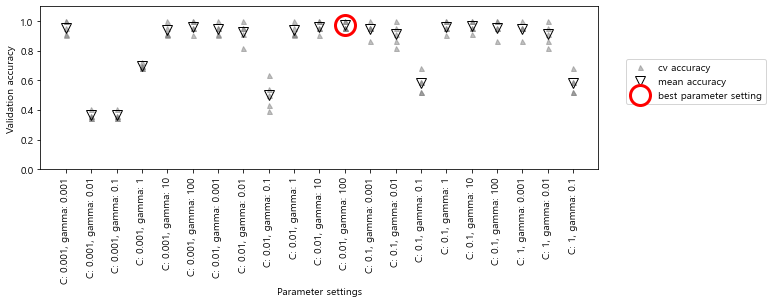

In [32]:
# In [25]:
# 교차 검증을 사용한 그리드 서치의 결과
mglearn.plots.plot_cross_val_selection()

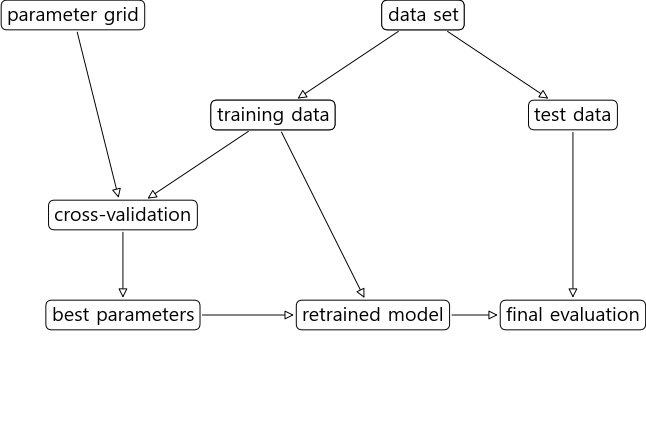

In [33]:
# In [26]:
mglearn.plots.plot_grid_search_overview()

+ 교차 검증을 사용한 그리드 서치를 매개변수 조정 방법으로 널리 사용하고 있음.  
따라서, scikit-learn에서는 추정기 형태로 구현된 GridSearchCV 제공.
+ GridSearchCV
  + 딕셔너리 형태로 검색 대상 매개변수를 지정해야 한다.
  + (키:조정하고자 하는 매개변수 이름/ 값:탐색할 매개변수 설정값)
  + 교차 검증을 사용한다.
  + fit메서드 : 최적의 매개변수를 찾는 일뿐만 아니라, 교차 검증 성능이 가장 좋은 매개변수로 전체 훈련 데이터셋에 대한 새로운 모델을 자동으로 만든다.

In [34]:
# In [27]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("매개변수 그리드:\n", param_grid)

매개변수 그리드:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [35]:
# In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [36]:
# In [29]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
random_state=0)

In [37]:
# In [30]:
# fit 메서드를 사용해 param_grid에 설정된 매개변수 조합에 대한 교차 검증 수행.
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [38]:
# In [31]:
print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))

테스트 세트 점수: 0.97


In [39]:
# In [32]:
print("최적 매개변수:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 매개변수: {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수: 0.97


In[32] 설명
+ 매개변수를 선택하는 데 테스트 세트를 사용하지 않았다.
+ 선택한 매개변수는 bestparams 속성에 담겨 있으며 최상의 교차 검증 정확도는 best_score_에 저장되어 있다.

In [41]:
# In [33]:
# 최적의 매개변수에서 전체 훈련 세트를 사용하여 학습한 모델 직접 접근할 때 best_estimator_을 사용한다.
print("최고 성능 모델:\n", grid_search.best_estimator_)

최고 성능 모델:
 SVC(C=10, gamma=0.1)


##### 교차 검증 결과 분석
+ 교차 검증의 결과를 시각화하면 검색 대상 매개변수가 모델의 일반화에 영향을 얼마나 주는지 이해하는데 도움이 된다.
+ 그리드 서치의 결과는 검색과 관련한 여러 정보가 함께 저장되어 있는 딕셔너리인 cv_results_속성에 담겨 있다.

In [42]:
# In [34]:
import pandas as pd
pd.set_option('display.max_columns', None)
# DataFrame으로 변환합니다
results = pd.DataFrame(grid_search.cv_results_)
# 처음 다섯 개 행을 출력합니다
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.000991106,0.00099802,0.000597477,0.000996208,0.000997162
std_fit_time,1.14719e-05,1.25255e-06,0.00048784,1.66279e-06,0.000630676
mean_score_time,0.000199842,0,0.000398922,0.000598955,0.000598764
std_score_time,0.000399685,0,0.000488578,0.000489046,0.000488889
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


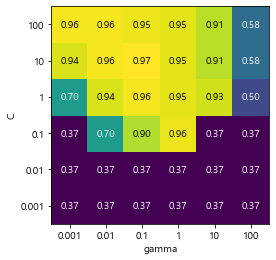

In [43]:
# In [35]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# 교차 검증 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In[35] 설명
+ 히트맵의 각 포인트는 특정 매개변수 설정에 대한 교차 검증 실행을 나타낸다.
+ 교차 검증의 정확도가 높으면 밝은 색으로 낮으면 어두운 색으로 나타난다.
+ In[30]의 히트맵을 보면, SVC가 매개변수 설정에 매우 민감하다는 것을 알 수 있다.

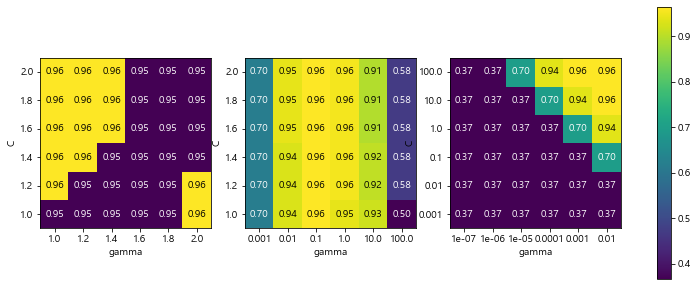

In [44]:
# In [36]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6),
'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
'gamma': np.logspace(-7, -2, 6)}
for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    # 교차 검증 평균 점수의 히트맵 그래프
    scores_image = mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
yticklabels=param_grid['C'], cmap="viridis", ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())

In[36] 설명
+ 적절하지 않은 매개변수 그리드의 히트맵.
+ 첫 번째 그래프  
점수 변화가 전혀 없어서 전체 매개변수 그리드가 같은 색이다.(책)  
((실제 돌리면, 0.95,0.96으로 두 개의 색이 출력됨..))  
이런 결과는 매개변수 C와 gamma의 스케일과 범위가 부적절할 때 발생.  
따라서 처음에는 매우 극단적인 값을 적용해보고, 매개변수를 바꿔가며 정확도가 변하는지 살펴보는 것이 좋다!!!  
  
+ 두 번째 그래프  
세로 띠 형태를 보인다.  
이는 gamma 매개변수만 정확도에 영향을 준다는 뜻이다.  
C 매개변수는 적절한 범위를 탐색하지 못했거나 중요한 매개변수가 아닐 수도 있다.  
  
+ 세 번째 그래프  
C와 gamma 둘 모두에 따라 값이 변했다.  
왼쪽 아래 영역은 아무런 변화가 없다. -> 다음 번 검색 땐 매개변수 그리드에서 매우 작은 단위는 제외될
것임.  
교차 검증 점수를 토대로 매개변수 그리드를 튜닝하는 것은 아주 안전한 방법이며, 매개변수들의 중요도
를 확인하는 데에도 좋다

##### 비대칭 매개변수 그리드 탐색
+ 어떤 경우에는 모든 매개변수의 조합에 대해 GridSearchCV를 수행하는 것이 좋은 생각이 아닐 수 있다.  
ex) SVC는 kernel 매개변수를 가지고 있는데 어떤 커널을 사용하는지에 따라 관련 있는 매개변수들이 결정된다.  
kernel='linear'이면 C 매개변수만 사용. kernel='rbf'이면 C와 gamma 모두 사용.
+ => 조건부 매개변수 조합을 적용하려면 GridSearchCV에 전달할 param_grid를 딕셔너리의 리스트로 만들어주면 된다. 각 딕셔너리는 독립적인 그리드로 적용된다.

In [45]:
# In [37]:
param_grid = [{'kernel': ['rbf'],
'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
{'kernel': ['linear'],
'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("그리드 목록:\n", param_grid)

그리드 목록:
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In[37] 설명
+ 첫 번째 그리드에서 kernel 매개변수는 rbf로 고정되고, C와 gamma 두 매개변수는 바뀐다.
+ 두 번째 그리드에서 kernel 매개변수는 항상 linear로 고정되고, C만 바뀐다.

In [46]:
# In [38]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("최적 파라미터:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


In [47]:
# In [39]:
results = pd.DataFrame(grid_search.cv_results_)
# 좀 더 나은 출력을 위해 결과를 전치시킵니다
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00119658,0.000997877,0.000998449,0.00119734,0.00100341,0.00139666,0.000997066,0.00120149,0.000599861,0.000791216,0.000797701,0.000797796,0.000797701,0.00099678,0.000199461,0.000997114,0.000797606,0.00099802,0.000795746,0.00079875,0.000598049,0.00059824,0.00099721,0.000997353,0.000598431,0.000399733,0.000598669,0.00059824,0.000997972,0.000997114,0.000598431,0.000398684,0.000399017,0.000598526,0.000598478,0.000997496,0.000797749,0.00039897,0.000598812,0.000598001,0.000398827,0.000399113
std_fit_time,0.000399555,1.54218e-06,1.20065e-06,0.000399004,1.28504e-05,0.000487256,1.2157e-06,0.000395581,0.000489788,0.000395776,0.000746149,0.000398898,0.000746277,0.000630752,0.000398922,4.10191e-07,0.000398803,0.000631732,0.000397895,0.000399377,0.000488305,0.000488461,6.50319e-07,4.37028e-07,0.000488617,0.000489573,0.000488812,0.000488461,4.10191e-07,4.10191e-07,0.000488617,0.000488286,0.000488694,0.000488695,0.000488656,4.10191e-07,0.000398874,0.000488636,0.000488928,0.000488266,0.000488461,0.000488812
mean_score_time,0.000399303,0.000996828,0.000797033,0,0,0.000797701,0.000998259,0.000798607,0.000598383,0.000604773,0.000398779,0.000398922,0.000399017,0.000199509,0.000598812,0,0.000399208,0.00039854,0.000798035,0.000199509,0.000398874,0.000399065,0,0.000399256,0.000398922,0.000399113,0,0.000199366,0.000399351,0.000399256,0.000399017,0,0.000199461,0.000199413,0.00059824,0.000399017,0,0.000398922,0.000199413,0.000199556,0.000199509,0.000199509
std_score_time,0.000489045,1.43844e-06,0.000398521,0,0,0.00039885,1.82822e-06,0.000399305,0.000488585,0.000493884,0.000488402,0.000488578,0.000488694,0.000399017,0.000488929,0,0.000488928,0.00048811,0.000399018,0.000399017,0.000488519,0.000488753,0,0.000488986,0.000488578,0.000488811,0,0.000398731,0.000489104,0.000488987,0.000488694,0,0.000398922,0.000398827,0.000488461,0.000488694,0,0.000488578,0.000398827,0.000399113,0.000399017,0.000399017
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': '

##### 그리드 서치에 다양한 교차 검증 적용
+ GridSearchCV는 분류에는 기본적으로 게층형 k-겹 교차 검증을 사용하고, 회귀에는 k-겹 교차 검증을 사용한다.
+ cv 매개변수를 이용해 다른 교차 검증 분할기도 사용 가능하다.  
ex) 훈련 세트와 검증 세트로 한 번만 분할하고 싶으면, n_splits=1로 하고, ShuffleSplit나
+ StratifiedShuffleSplit를 사용한다.

#### 중첩 교차 검증
+ GridSearchCV는 훈련 세트와 테스트 세트로 나눈 다음, 훈련 세트로 교차 검증을 수행하는 방식.
+ 훈련 세트와 테스트 세트로 한 번만 나누기 때문에, 결과가 불안정하고 테스트 데이터의 분할에 크게 의존한다.
+ 중첩 교차 검증.
  + 원본 데이터를 훈련 세트와 테스트 세트로 한 번만 나누는 방식 대신 더 나아가 교차 검증 분할 방식을 사용할 수 있다.  
      
      
+ 1. 바깥쪽 루프에서 데이터를 훈련 세트와 테스트 세트로 나눈다.
+ 2. 각 훈련 세트에 대해 그리드 서치를 실행한다.
+ 3. 바깥쪽에서 분할된 테스트 세트의 점수를 최적의 매개변수 설정을 사용해 각각 측정한다.  
  
  
+ 모델이나 매개변수 설정이 아닌 테스트 점수의 목록을 만들어준다. 
+ 목록의 점수들은 그리드 서치를 통해 찾은 최적 매개변수가 모델을 얼마나 잘 일반화시키는지 알려준다.
+ 중첩 교차 검증은 미래의 데이터에 적용하기 위한 예측 모델을 찾는 데는 거의 사용하지 않는다.
+ 이것은 특정 데이터셋에서 주어진 모델이 얼마나 잘 일반화되는지 평가하는 데 유용한 방법이다.

In [48]:
# In [40]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
iris.data, iris.target, cv=5)
print("교차 검증 점수: ", scores)
print("교차 검증 평균 점수: ", scores.mean())
print(param_grid)

교차 검증 점수:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차 검증 평균 점수:  0.9800000000000001
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [49]:
# In [41]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # outer_cv의 분할을 순회하는 for 루프
    # (split 메소드는 훈련과 테스트 세트에 해당하는 인덱스를 리턴합니다 )
    for training_samples, test_samples in outer_cv.split(X, y):
        # 최적의 매개변수를 찾습니다
        best_parms = {}
        best_score = -np.inf
        # 매개변수 그리드를 순회합니다
        for parameters in parameter_grid:
            # 안쪽 교차 검증의 점수를 기록합니다
            cv_scores = []
            # inner_cv의 분할을 순회하는 for 루프
            for inner_train, inner_test in inner_cv.split(
                X[training_samples], y[training_samples]):
                # 훈련 데이터와 주어진 매개변수로 분류기를 만듭니다
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # 검증 세트로 평가합니다
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 안쪽 교차 검증의 평균 점수를 계산합니다
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # 점수가 더 높은면 매개변수와 함께 기록합니다
                best_score = mean_score
                best_params = parameters
        # 바깥쪽 훈련 데이터 전체를 사용해 분류기를 만듭니다
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
# 테스트 세트를 사용해 평가합니다
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [50]:
# In [42]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("교차 검증 점수:", scores)

교차 검증 점수: [0.96666667 1.         0.96666667 0.96666667 1.        ]


##### 교차 검증과 그리드 서치 병렬화
+ 그리드 서치는 데이터 용량이 크고 매개변수 수도 많을 때는 상당한 연산 부하를 일으키지만, 다행히 쉽게 병렬화할 수 있다.
+ 하나의 교차 검증 분할에서 특정 매개변수 설정을 사용해 모델을 만드는 일은 다른 매개변수 설정이나 모델과 전혀 상관없이 진행할 수 있기 때문이다.
+ 그래서, 그리드 서치와 교차 검증은 여러 CPU 코어 또는 클러스터에 병렬화하기 좋다.
+ GridSearchCV 와 cross_val_score에서 n_jobs 매개변수에 사용할 CPU 코어 수를 지정할 수 있다.  
(n_jobs=-1은 가능한 모든 코어 사용한다는 의미.)

## 5.3 평가 지표와 측정
+ 분류 성능 평가 > 정확도
+ 회귀 성능 평가 > R2
+ 주어진 데이터셋에 대한 지도 학습 모델의 성능을 재는 방법은 그 이외에도 많다

### 5.3.1 최종 목표를 기억하라
+ 평가 지표를 선택할 때 머신러닝 애플리케이션의 고차원적인 목표라고 부르는 비지니스 지표를 기억해야 한다.
+ 비지니스 임팩트: 어떤 머신러닝 애플리케이션에서 특정 알고리즘을 선택하여 나타난 결과
+ 모델을 선택하고 매개변수를 조정할 때, 이런 비즈니스 지표에 긍정적인 영향을 주는 모델과 매개변수를 선택
해야 함.

### 5.3.2 이진 분류의 평가 지표
+ 이진 분류 - 양성클래스(관심클래스)/음성클래스

+ 에러의 종류
  + 예를 들어 자동화 테스트로 암을 조기 발견하는 애플리케이션
  + 음성클래스 - 건강한 사람
  + 양성클래스 - 암 진단 받은 사람
+ 거짓양성(타입 1 에러) - 건강한 사람을 양성으로 예측
+ 거짓음성(타입 2 에러) - 암에 걸린 사람을 음성으로 예측

##### 불균형 데이터셋
+ 한 클래스가 다른 것보다 훨씬 많은 데이터셋

+ 예를 들어, 노출 데이터로 클릭을 예측
+ 목표는 특정 상품을 보여주면 사용자가 클릭을 할지를 예측
+ 샘플의 99%가 '클릭 아님' 클래스에 속함
+ 클릭을 99% 정확도로 예측하는 분류기를 만들었다고 해도 무조건 '클릭 아님' 이라고 예측해도 99%
+ 정확도로는 '모조건 클릭 아님' 모델과 '진짜 좋은 모델'을 구분하기 어려움  
  
+ 예를 들어, digits 데이터셋을 사용해 숫자 9를 다른 숫자와 구분해서 9:1의 불균형한 데이터셋을 만듦.

In [52]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(
digits.data, y, random_state=0)

+ y는 digits.target의 값이 0~8일 때는 False, 9일 때는 True인 이진 분류 문제

In [53]:
from sklearn.dummy import DummyClassifier
import numpy as np
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 고유값:", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 점수: 0.90


In [54]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


+ 정확도로 보면 DummyClassifier 보다 DecisionTreeClassfier가 조금 나을 뿐, 정확도가 높은 측정 방법은 아님

In [55]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.82
logreg 점수: 0.98


##### 오차행렬  
오차행렬은 이진 분류 평가 결과를 나타낼 때 가장 널리 사용하는 방법 중 하나
+ 행은 정답 클래스에 해당하고,열은 예측 클래스에 해당
+ FP(가짜양성), FN(가짜음성), TP(진짜양성), TN(진짜음성)

In [56]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n", confusion)

오차 행렬:
 [[402   1]
 [  6  41]]


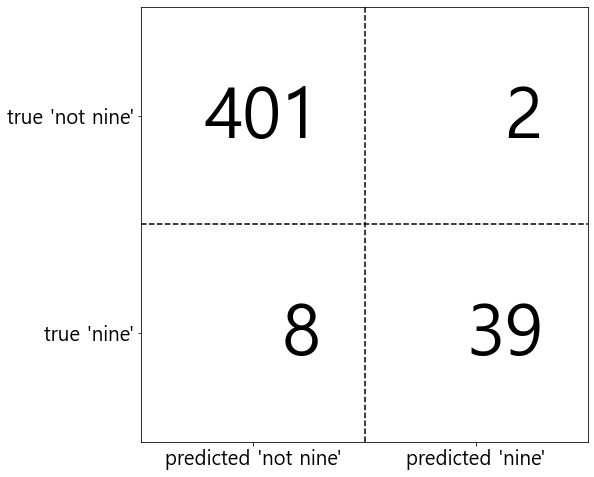

In [57]:
import mglearn
mglearn.plots.plot_confusion_matrix_illustration()

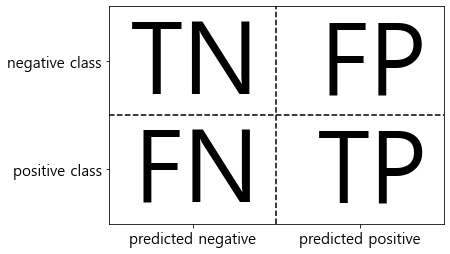

In [58]:
mglearn.plots.plot_binary_confusion_matrix()

+ 오차 행렬을 사용하여 앞서 만든 모델(더미 모델 2개, 결정트리, 로지스틱 회귀)을 비교

In [59]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[364  39]
 [ 40   7]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[402   1]
 [  6  41]]


+ 정확도와의 관계
  + 정확히 예측한 수(TP,TN)를 전체 샘플 수로 나눈 값

+ 정밀도, 재현율, f-점수
  + 정밀도(양성 예측도)
      + 양성으로 예측된 것 중 얼마나 많은 샘플이 진짜 양성인지 측정 
      + 거짓 양성의 수를 줄이는 것이 목표

+ 재현율(민감도,적중률,진짜 양성 비율)
  + 전체 양성 샘플 중에서 얼마나 많은 샘플이 양성 클래스로 분류되는지를 측정
  + 모든 양성 샘플을 식별해야 할 때 성능 지표로 사용, 즉 거짓 음성을 피하는 것이 중요할 때 ex) 암진단 사례
+ 재현율 최적화와 정밀도 최적화는 상충
+ f-점수
  + 정밀도와 재현율을 하나로 요약


In [60]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.15
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


+ classification_report 함수는 정밀도, 재현율,f-점수 모두를 한 번에 계산해서 깔끔하게 출력

+ 지지도(support): 이 클래스에 있는 진짜 샘플의 수
+ macro avg: 클래스별 점수의 평균
+ weighted avg: 클래스의 샘플 수로 가중 평균한 것

In [62]:
print(classification_report(y_test, pred_dummy,
target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      0.90      0.90       403
           9       0.15      0.15      0.15        47

    accuracy                           0.82       450
   macro avg       0.53      0.53      0.53       450
weighted avg       0.82      0.82      0.82       450



In [63]:
print(classification_report(y_test, pred_logreg,
target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



+ 불확실성 고려
  + 오차 행렬과 분류 리포트가 예측 결과를 자세히 분석할 수 있도록 도와준다.
  + 하지만 예측값은 모델에 담긴 많은 정보가 이미 손실된 상태
  + 예측의 확신을 가늠하기 위해 decision_function 이나 predict_proba 메서드를 제공
  + 이진 탐색에서 decision_function:0 / predict_proba:0.5 를 임계값으로 사용

In [64]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

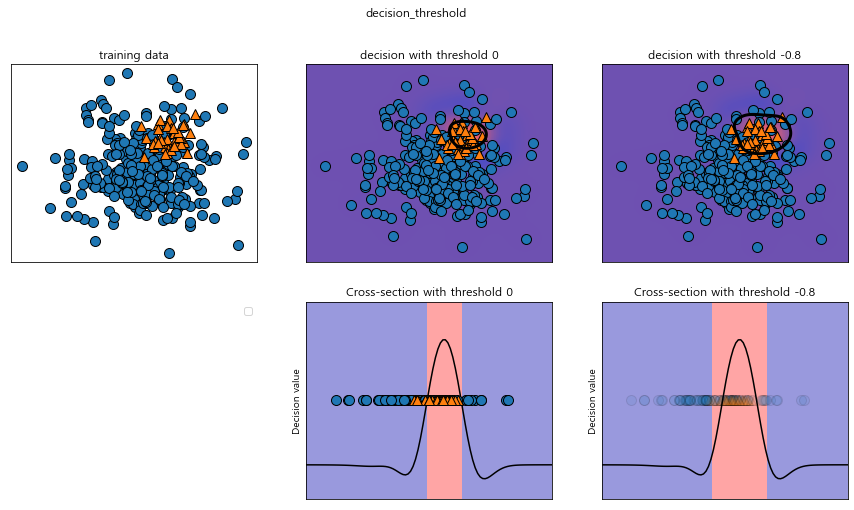

In [65]:
mglearn.plots.plot_decision_threshold()

+ 위 그림에 중앙 윗부분에 있는 검은 원은 decision_function이 정확히 0일 때의 임계점을 나타낸다.
+ 이 원 안의 포인트는 양성 클래스로 분류되며 바깥쪽 포인트는 음성 클래스로 분류

In [66]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



+ 클래스 0의 샘플이 매우 많으므로 분류기는 소수인 클래스 1보다 클래스 0에 초점을 맞추고 있다.
+ 만약 클래스1의 재현율을 높이는 게 중요하다고 가정(암 진단 예)
+ 임계값을 바꿔 클래스1의 재현율을 높이도록 예측을 조정할 수 있습니다

In [67]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [68]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



+ 임계값을 선택할 때 테스트 세트를 사용하지 않도록 주의를 기울여야 한다.
+ 임계값 설정에 테스트 세트를 사용하면 과도하게 낙관적인 결과를 만들 가능성이 높으므로 대신 검증 세트나 교차 검증을 사용해야 한다.

##### 정밀도-재현율 곡선과 ROC 곡선
+ 임계값을 바꾸는 것은 해당 분류기의 정밀도와 재현율의 상충 관계를 조정하는 일
+ 분류기의 필요조건을 지정하는 것(90% 재현율)을 운영 포인트를 지정한다고 하며, 이를 고정하면 비즈니스 목표를 설정할 때 성능을 보장 새로운 모델을 만들 때는 운영 포인트가 명확하지 않은 경우가 많음,이를 위해 정밀도-재현율 곡선 (precision_recall_curve)을 사용

In [69]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
y_test, svc.decision_function(X_test))

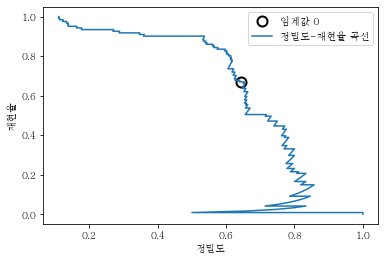

In [70]:
import matplotlib.pyplot as plt
plt.rc('font',family='Batang')
# 부드러운 곡선을 위해 데이터 포인트 수를 늘립니다
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
y_test, svc.decision_function(X_test))
# 0에 가까운 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="임계값 0", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="정밀도-재현율 곡선")
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

+ 검은 원은 decision_function의 기본 임계값인 0지점을 나타낸다.
+ 곡선이 오른쪽 위로 갈수록 더 좋은 분류기
+ 정밀도가 높아져도 재현율이 높게 유지될수록 더 좋은 모델입니다.

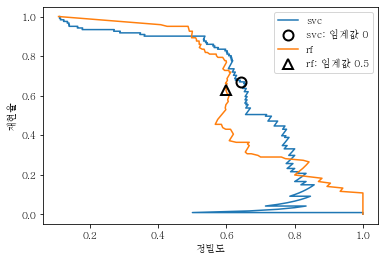

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
# RandomForestClassifier는 decision_function 대신 predict_proba를 제공합니다.
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="svc: 임계값 0", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
markersize=10, label="rf: 임계값 0.5", fillstyle="none", mew=2)
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

+ 재현율이 매우 높거나 정밀도가 매우 높을 때는 랜덤 포레스트가 더 낫다
+ 가운데 근처에서는 SVM이 더 좋다.
+ f-점수는 정밀도-재현율 곡선의 한 지점인 기본 임계값에 대한 점수

In [72]:
print("랜덤 포레스트의 f1_score: {:.3f}".format(
f1_score(y_test, rf.predict(X_test))))
print("svc의 f1_score: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

랜덤 포레스트의 f1_score: 0.610
svc의 f1_score: 0.656


In [73]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.660
svc의 평균 정밀도: 0.666


전체 곡선에 담긴 정보를 요약, 이러한 요약 방법의 하나로 정밀도-재현율 곡선의 아랫부분 면적을 계산할 수
있으며, 이를 평균 정밀도 라고 한다.

##### ROC 와 AUC
+ ROC곡선은 여러 임계값에서 분류기의 특성을 분석하는데 널리 사용하는 도구
+ 정밀도와 재현율 대신 진짜 양성 비율(재현율)에 대한 거짓 양성 비율을 나타낸다.

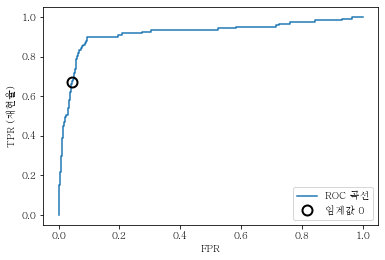

In [75]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC 곡선")
plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
# 0 근처의 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="임계값 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

ROC 곡선은 왼쪽 위에 가까울수록 이상적

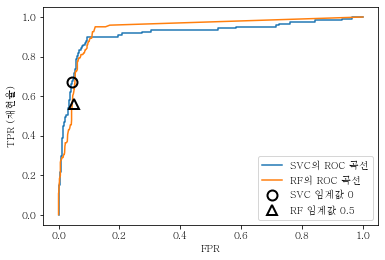

In [76]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="SVC의 ROC 곡선")
plt.plot(fpr_rf, tpr_rf, label="RF의 ROC 곡선")
plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="SVC 임계값 0", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
label="RF 임계값 0.5", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [77]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 AUC: {:.3f}".format(rf_auc))
print("SVC의 AUC: {:.3f}".format(svc_auc))

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916


+ 정밀도-재현율 곡선에서처럼 곡선 아래의 면적값 하나로 ROC 곡선을 요약(AUC), roc_auc_score 함수로 계산
+ 데이터셋에 담긴 클래스가 아무리 불균형하더라도 무작위로 예측한 값은 0.5(무작위로 분류하면 양성,음성 비율이 비슷해진다)  
  
+ 불균형한 데이터셋에서는 정확도보다 ACU가 훨씬 좋은 지표

gamma = 1.00 정확도 = 0.90 AUC = 0.50
gamma = 0.10 정확도 = 0.90 AUC = 0.96
gamma = 0.01 정확도 = 0.90 AUC = 1.00


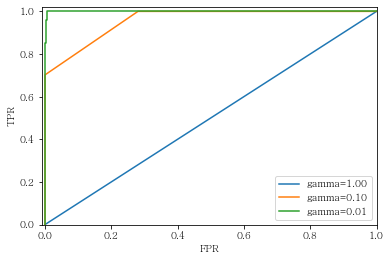

In [79]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(
digits.data, y, random_state=0)
plt.figure()
for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f} 정확도 = {:.2f} AUC = {:.2f}".format(
    gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.2f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

### 5.3.3 다중 분류의 평가 지표
+ 다중 분류를 위한 지표는 모두 이진 분류 평가 지표에서 유도되었으며, 다만 모든 클래스에 대해 평균을 낸 것입니다.
+ 다중 분류의 정확도도 정확히 분류된 샘플의 비율로 정의합니다.
+ 그래서 클래스가 불균형할 때는 정확도는 좋은 평가 방법이 되지 못합니다.
+ 다중 분류의 평가에는 정확도 외에 오차 행렬과 분류 리포트 등을 일반적으로 사용합니다.

In [80]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(
digits.data, y, random_state=0)

In [81]:
#In [69]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
digits.data, digits.target, random_state=0)
lr = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)
pred = lr.predict(X_test)
print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n", confusion_matrix(y_test, pred))

정확도: 0.953
오차 행렬:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


+ 오차 행렬은 이진 분류에서처럼 각 행은 정답 레이블, 열은 예측 레이블에 해당합니다.

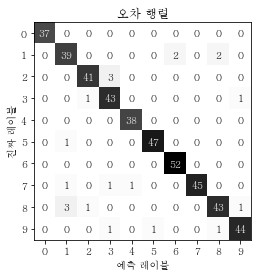

In [82]:
#In [70]:
scores_image = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='예측 레이블',
ylabel='진짜 레이블', xticklabels=digits.target_names,
yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("오차 행렬")
plt.gca().invert_yaxis()

+ 첫 번째 클래스인 숫자 0은 샘플이 총 37개이며, 모두 클래스 0으로 분류했습니다.
+ 클래스 0으로 잘못 분류한 숫자가 하나도 없습니다.
+ 하지만 어떤 숫자들은 잘못 분류한 것도 있습니다.

In [83]:
#In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



+ 숫자 0에는 오차가 없으므로 클래스 0의 정밀도와 재현율은 모두 1로 완벽합니다.
+ 클래스 7은 다른 클래스가 7로 잘못 분류한 것이 없어서 정밀도가 1이고, 클래스 6은 거짓 음성이 없어서 재현율이 1입니다.
+ 이 모델은 클래스 1,3,8을 분류하는 데 어려움을 겪고 있습니다.

+ 다중 분류에서 불균형 데이터셋을 위해 가장 널리 사용하는 평가 지표는 'f1-점수의 다중 분류 버전'입니다.
+ 'f1-점수의 다중 분류 버전': 한 클래스를 양성 클래스로 두고 나머지 클래스들을 음성 클래스로 간주하여 클래스마다 f1-점수를 계산하여 평균을 냅니다.
  + "macro" 평균: 가중치를 주지 않습니다. 클래스 크기에 상관없이 모든 클래스를 같은 비중으로 다룹니다.
  + "weighted" 평균: 클래스별 샘플 수로 가중치를 두어 계산합니다.
  + "micro" 평균: 모든 클래스의 거짓 양성, 거짓 음성, 진짜 양성의 총 수를 헤아린 다음 정밀도, 재현율, f1-점수를 이 수치로 계산합니다.

In [84]:
#In [72]:
from sklearn.metrics import f1_score
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="macro")))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954


### 5.3.4 회귀의 평가 지표
대부분의 애플리케이션에서는 회귀 추정기의 score 메서드에서 이용하는 R 만으로 충분합니다.

### 5.3.5 모델 선택에서 평가 지표 사용하기
+ scikit-learn에서는 GridSearchCV와 cross_val_score의 scoring 매개변수에 사용하려는 평가 지표를 문자열로 넘겨주면 됩니다.
+ 기본값은 '정확도'이고 '평균 정밀도'로 바꾸려면 scoring 매개변수에 average_precision이라고 지정하면
됩니다.

In [85]:
#In [73]:
from sklearn.model_selection import cross_val_score
# 분류의 기본 평가 지표는 정확도 입니다
print("기본 평가 지표:",
cross_val_score(SVC(), digits.data, digits.target == 9, cv=5))
# scoring="accuracy"의 결과와 같습니다.
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9,
scoring="accuracy", cv=5)
print("정확도 지표:", explicit_accuracy)
ap = cross_val_score(SVC(), digits.data, digits.target == 9,
scoring="average_precision", cv=5)
print("평균 정밀도 지표:", ap)

기본 평가 지표: [0.975      0.99166667 1.         0.99442897 0.98050139]
정확도 지표: [0.975      0.99166667 1.         0.99442897 0.98050139]
평균 정밀도 지표: [0.97562403 0.9886322  1.         0.99853801 0.95015534]


+ cross_validate 함수를 사용하면 한 번에 여러 측정 지표를 계산할 수 있습니다.

In [86]:
#In [74]:
from sklearn.model_selection import cross_validate
res = cross_validate(SVC(), digits.data, digits.target == 9,
scoring=["accuracy", "average_precision", "recall_macro"],
return_train_score=True, cv=5)
display(pd.DataFrame(res))

,fit_time,score_time,test_accuracy,train_accuracy,test_average_precision,train_average_precision,test_recall_macro,train_recall_macro
0,0.029920,0.012967,0.975000,0.994433,0.975624,0.994997,0.887346,0.972222
1,0.032914,0.014961,0.991667,0.995825,0.988632,0.996010,0.958333,0.982252
2,0.027925,0.012966,1.000000,0.995132,1.000000,0.995317,1.000000,0.978780
3,0.026960,0.012965,0.994429,0.995828,0.998538,0.995257,0.972222,0.982252
4,0.025931,0.011969,0.980501,0.996523,0.950155,0.999257,0.902778,0.985725


+ 비슷하게 GridSearchCV에서 최적의 매개변수를 선택하기 위한 평가 지표를 바꿀 수 있습니다.

In [87]:
#In [75]:
from sklearn.metrics import average_precision_score
X_train, X_test, y_train, y_test = train_test_split(
digits.data, digits.target == 9, random_state=0)
# 일부러 적절하지 않은 그리드를 만듭니다
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# 기본 정확도 측정 지표를 사용합니다
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("정확도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (정확도)): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(
average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(
# grid.score 점수와 동일합니다
accuracy_score(y_test, grid.predict(X_test))))

정확도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.0001}
최상의 교차 검증 점수 (정확도)): 0.976
테스트 세트 평균 정밀도: 0.966
테스트 세트 정확도: 0.973


+ 정확도를 사용할 땐 gamma=0.01이 선택되지만, 평균 정밀도를 사용하면 gamma=0.01이 선택됩니다.
+ 두 경우 모두 교차 검증 점수가 테스트 세트에 대한 결과와 일치합니다.

+ scoring 매개변수의 옵션들은 metrics.scorer 모듈의 SCORERS 딕셔너리를 보면 알 수 있습니다.